In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

In [2]:
class neuralNetwork:
#     инициализация сети
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.inodes = input_nodes
        self.hnodes = hidden_nodes
        self.onodes = output_nodes
        
        self.activation_func = lambda x:scipy.special.expit(x)
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5),
                                   (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5),
                                   (self.onodes, self.hnodes))
        
        self.lr = learning_rate
        
        self.epochs = []
        self.efficiency = []
        
        self.who_remarks = []
        self.wih_remarks = []
        self.i = 0

#     тренировка
    def train_one_dataset(self, inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_func(hidden_inputs)
        
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_func(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = np.dot(self.who.T, output_errors)
        
        self.who += self.lr * np.dot((output_errors * final_outputs *
                (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs *
                (1.0 - hidden_outputs)), np.transpose(inputs))
            
    
    
    def train(self, training_data_list, test_data_list, epochs):
        self.epochs = []
        self.efficiency = []
        for e in range(epochs):
            for train_record in training_data_list:
                all_values = train_record.split(',')
                inputs = (np.asfarray(all_values[1:]) / 255 * 0.99) + 0.01
                targets = np.zeros(self.onodes)
                targets[int(all_values[0])] = 0.99
                self.train_one_dataset(inputs, targets)
            
            self.calc_efficiency(test_data_list)
            self.epochs.append(e)
    
    
    def calc_efficiency(self, test_data_list):
        scorecard = []
        for test_record in test_data_list:
            all_values = test_record.split(',')
            correct_label = int(all_values[0])
            inputs = (np.asfarray(all_values[1:])/ 255 * 0.99) + 0.01
            outputs = self.query(inputs)
            self_label = np.argmax(outputs)
            if correct_label == self_label:
                scorecard.append(1)
            else:
                scorecard.append(0)
                
        scorecard_array = np.array(scorecard)
        self.efficiency.append(scorecard_array.sum() / scorecard_array.size)
            
#     опрос сети
    def query(self, inputs_list):
        inputs = np.array(inputs_list, ndmin=2).T
        
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_func(hidden_inputs)
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_func(final_inputs)
        
        return final_outputs

In [3]:
class neuralNetworkWithDerivative:
#     инициализация сети
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.inodes = input_nodes
        self.hnodes = hidden_nodes
        self.onodes = output_nodes
        
        self.activation_func = lambda x:scipy.special.expit(x)
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5),
                                   (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5),
                                   (self.onodes, self.hnodes))
        
        self.lr = learning_rate
        
        self.epochs = []
        self.efficiency = []
        
        self.who_remarks = []
        self.wih_remarks = []
        self.i = 0

#     тренировка
    def train_one_dataset(self, inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_func(hidden_inputs)
        
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_func(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = np.dot(self.who.T, output_errors)
        
        self.who += self.lr * np.dot((output_errors * 
                                      self.derivative(final_inputs)
#                                       final_outputs * (1.0 - final_outputs)
                                     ), np.transpose(hidden_outputs))
        
        self.wih += self.lr * np.dot((hidden_errors * 
                                      self.derivative(hidden_inputs)
#                                       hidden_outputs * (1.0 - hidden_outputs)
                                     ), np.transpose(inputs))
            
    
    
    def train(self, training_data_list, test_data_list, epochs):
        self.epochs = []
        self.efficiency = []
        for e in range(epochs):
            for train_record in training_data_list:
                all_values = train_record.split(',')
                inputs = (np.asfarray(all_values[1:]) / 255 * 0.99) + 0.01
                targets = np.zeros(self.onodes)
                targets[int(all_values[0])] = 0.99
                self.train_one_dataset(inputs, targets)
            
            self.calc_efficiency(test_data_list)
            self.epochs.append(e)
    
    
    def calc_efficiency(self, test_data_list):
        scorecard = []
        for test_record in test_data_list:
            all_values = test_record.split(',')
            correct_label = int(all_values[0])
            inputs = (np.asfarray(all_values[1:])/ 255 * 0.99) + 0.01
            outputs = self.query(inputs)
            self_label = np.argmax(outputs)
            if correct_label == self_label:
                scorecard.append(1)
            else:
                scorecard.append(0)
                
        scorecard_array = np.array(scorecard)
        self.efficiency.append(scorecard_array.sum() / scorecard_array.size)
            
#     опрос сети
    def query(self, inputs_list):
        inputs = np.array(inputs_list, ndmin=2).T
        
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_func(hidden_inputs)
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_func(final_inputs)
        
        return final_outputs
    
    def derivative(self, xs):
        dx = 0.1
        return (self.activation_func(xs + dx) - self.activation_func(xs - dx)) / (2*dx)

In [30]:
input_nodes = 784
hidden_nodes = 300
output_nodes = 10

learning_rate = 0.01

epochs = 15

training_data_file = open('mnist_train.csv', 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()
training_data_list = training_data_list
    
test_data_file = open('mnist_test.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()


In [31]:
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
n.train(training_data_list, test_data_list, epochs)

max accuracy is 0.9711 at 14 epoch


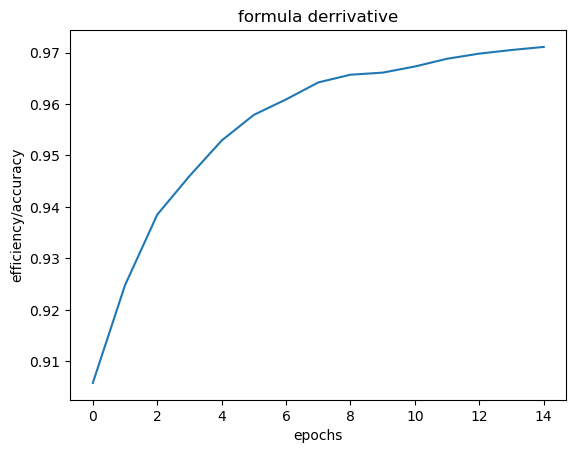

In [32]:
plt.title('formula derrivative')
plt.ylabel('efficiency/accuracy')
plt.xlabel('epochs')
plt.plot(n.epochs, n.efficiency)
maxima = np.argmax(np.array(n.efficiency))
print(f'max accuracy is {n.efficiency[maxima]} at {maxima} epoch' )

In [33]:
nwd = neuralNetworkWithDerivative(input_nodes, hidden_nodes, output_nodes, learning_rate)
nwd.train(training_data_list, test_data_list, epochs)

max accuracy is 0.9727 at 14 epoch


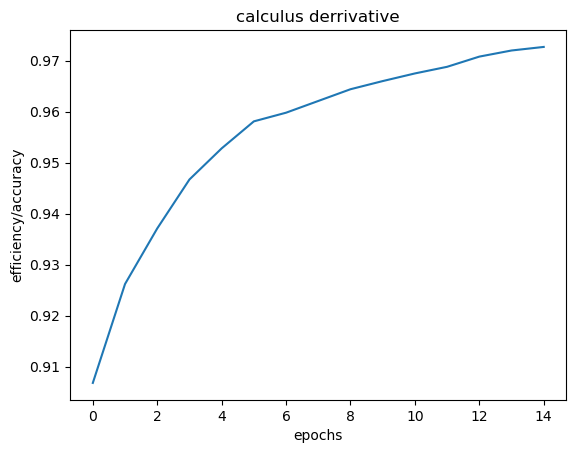

In [34]:
plt.title('calculus derrivative')
plt.ylabel('efficiency/accuracy')
plt.xlabel('epochs')
plt.plot(nwd.epochs, nwd.efficiency)
maxima = np.argmax(np.array(nwd.efficiency))
print(f'max accuracy is {nwd.efficiency[maxima]} at {maxima} epoch' )

In [36]:
test_data_file = open('mnist_test_10.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

scorecard = []

for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
#     print(correct_label, 'true marker')
    
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    label = np.argmax(outputs)
#     print(label, 'response NN')
    if label == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)

# print(scorecard)

scorecard_array = np.asarray(scorecard)
print('effieciency = ', scorecard_array.sum()/ scorecard_array.size)
print(scorecard)

effieciency =  1.0
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
